# Sentiment Analysis of Twitter Data

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

## Reading Dataset

In [5]:
df_tweet = pd.read_csv(r'C:\Users\Brij\Downloads\archive\training1600000.csv')


In [6]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Ploting Dataset as per Sentiment Value

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Questions')

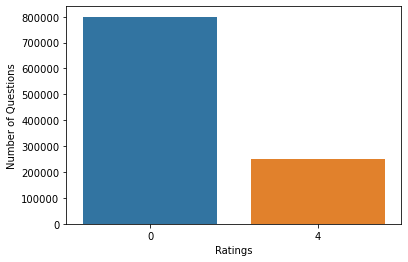

In [7]:
sns.countplot(df_tweet.Target)
plt.xlabel('Ratings')
plt.ylabel('Number of Questions')

In [8]:
df_Neg = df_tweet[df_tweet['Target']==0]
df_Pos = df_tweet[df_tweet['Target']==4]

In [9]:
from PIL import Image

## Ploting Word Cloud of Negative and Positive Tweets

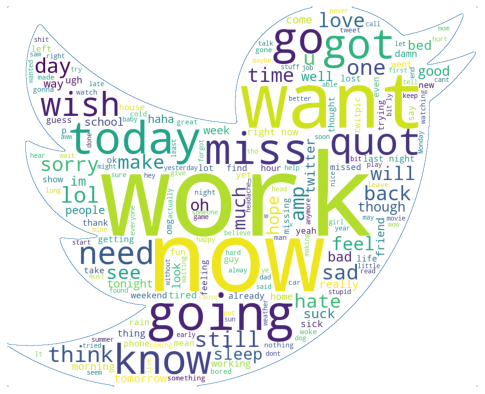

In [10]:
twitter_mask = np.array(Image.open(r"C:\Users\Brij\Desktop\twitter_mask.png"))

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Neg['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negative-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

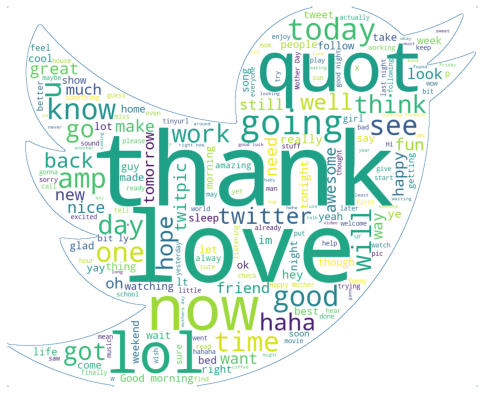

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Pos['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positive-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

## Adding Sentiment from Target Value

In [12]:
df_tweet['Sentiment'] = df_tweet.Target.replace({
    0:'negative',
    2:'neutral',
    4:'positive'
})

In [13]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text,Sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,negative


In [14]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
from textblob import TextBlob

In [17]:
df_sample = df_tweet.sample(n=50000)
df_X = df_sample['Text']
df_y = df_sample['Sentiment']

## Introduced Subjectivity and Polarity with use of TextBlob

In [18]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_sample['Subjectivity']=df_sample['Text'].apply(getSubjectivity)
df_sample['Polarity']=df_sample['Text'].apply(getPolarity)
df_sample

,Target,Id,Date,Flag,User,Text,Sentiment,Subjectivity,Polarity
613119,0,2225244497,Thu Jun 18 10:29:12 PDT 2009,NO_QUERY,didi_do_da,@jonaskevin homework why do we need it ?! lol...,negative,0.700000,0.800000
868506,4,1677957688,Sat May 02 04:51:47 PDT 2009,NO_QUERY,demib,@andyatkinskruge Anyone that have seen my coll...,positive,0.508333,0.233333
621394,0,2228793831,Thu Jun 18 14:53:40 PDT 2009,NO_QUERY,NinaCruz927,No more stairs ...,negative,0.500000,-0.250000
1017940,4,1881931916,Fri May 22 05:53:02 PDT 2009,NO_QUERY,tinalu8889,"Ahm.... test, test, one, two, three.....",positive,0.000000,0.000000
331364,0,2012647794,Tue Jun 02 21:01:58 PDT 2009,NO_QUERY,willcg83,Another long night. save me from the madness,negative,0.400000,-0.050000
...,...,...,...,...,...,...,...,...,...
898440,4,1693608029,Sun May 03 23:07:05 PDT 2009,NO_QUERY,DaniScot,"@iamjonathancook I can sleep, I'm just choosin...",positive,0.850000,0.900000
33188,0,1564444734,Mon Apr 20 03:31:20 PDT 2009,NO_QUERY,karifur,Dogs woke me up an hour ago and i can't get ba...,negative,0.000000,0.000000
553029,0,2203534170,Tue Jun 16 23:57:25 PDT 2009,NO_QUERY,Corbana,Dammit got up this morning hoping for a 3.0 so...,negative,0.700000,0.000000
673930,0,2247638526,Fri Jun 19 19:23:56 PDT 2009,NO_QUERY,wigenout,@Alli_Flowers But then I would have to leave ...,negative,0.288889,-0.155556


In [19]:
# #Plotting the polarity and subjectivity
# plt.figure(figsize=(8,6))
# for i in range(0,df_sample.shape[0]):
# plt.scatter(df_sample['Polarity'].iloc[i],df_sample['Subjectivity'].iloc[i],color='Green')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [20]:
df_X = df_X.astype(str)

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Overall ratings')

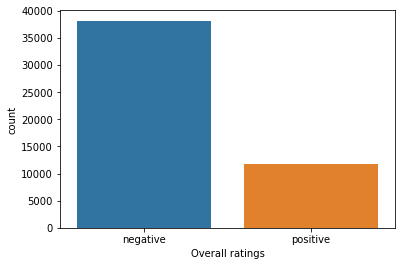

In [21]:
sns.countplot(df_y)
plt.xlabel('Overall ratings')

In [22]:
df_X

613119     @jonaskevin homework  why do we need it ?! lol...
868506     @andyatkinskruge Anyone that have seen my coll...
621394                                   No more stairs ... 
1017940            Ahm.... test, test, one, two, three..... 
331364         Another long night.  save me from the madness
                                 ...                        
898440     @iamjonathancook I can sleep, I'm just choosin...
33188      Dogs woke me up an hour ago and i can't get ba...
553029     Dammit got up this morning hoping for a 3.0 so...
673930     @Alli_Flowers But then I would have  to leave ...
740001     is is back after 1 day of not checking her acc...
Name: Text, Length: 50000, dtype: object

In [23]:
df_y

613119     negative
868506     positive
621394     negative
1017940    positive
331364     negative
             ...   
898440     positive
33188      negative
553029     negative
673930     negative
740001     negative
Name: Sentiment, Length: 50000, dtype: object

In [24]:
df_rev = pd.DataFrame(data=df_X)
df_rev.columns = ['Text']
df_rev.head()

,Text
613119,@jonaskevin homework why do we need it ?! lol...
868506,@andyatkinskruge Anyone that have seen my coll...
621394,No more stairs ...
1017940,"Ahm.... test, test, one, two, three....."
331364,Another long night. save me from the madness


## Preprocessing and Cleaning of data 

In [26]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    columntext = doc["Text"] 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', columntext)
    
    tokens = cleantext.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [27]:
df_sample['Body_token'] =  df_sample.apply(clean_doc, axis=1)

In [28]:
def listToString(s): 
    
    columntext = s["Body_token"]
    # initialize an empty string
    str1 = ' '.join([str(elem) for elem in columntext])
    # return string  
    return str1

In [29]:
df_sample['Body_token_string'] =  df_sample.apply(listToString, axis=1)

## Feature Extraction with the help of CountVectorizer and Tfidf

In [30]:
def final(X_data_full):
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [31]:
df_new = df_sample['Body_token_string']
df_new= df_new.astype(str)

## Training and Testing Split

In [32]:
data_X = final(df_new)
X_train, X_test, y_train, y_test = train_test_split(data_X, df_y, test_size=0.25, random_state= 3000)

## Multinomial Naive Byes 

In [33]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
predictions = multinomialNB.predict(X_test)

In [34]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

multinomialNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
multinomialNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , multinomialNB_accuracy , " %")
print("f1_score : " , multinomialNB_f1)

              precision    recall  f1-score   support

    negative       0.79      0.99      0.88      9567
    positive       0.85      0.16      0.27      2933

    accuracy                           0.80     12500
   macro avg       0.82      0.58      0.58     12500
weighted avg       0.81      0.80      0.74     12500

[[9483   84]
 [2455  478]]
Accuracy :  79.69  %
f1_score :  0.739


## Decision Trees

In [35]:
# Decision Trees
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dct_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

[[7964 1603]
 [1624 1309]]
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      9567
    positive       0.45      0.45      0.45      2933

    accuracy                           0.74     12500
   macro avg       0.64      0.64      0.64     12500
weighted avg       0.74      0.74      0.74     12500

Accuracy :  74.18  %
f1_score :  0.742


## Logistic Regression

In [37]:
model = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
log_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
log_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , log_accuracy , " %")
print("f1_score : " , log_f1)

[[9113  454]
 [1708 1225]]
              precision    recall  f1-score   support

    negative       0.84      0.95      0.89      9567
    positive       0.73      0.42      0.53      2933

    accuracy                           0.83     12500
   macro avg       0.79      0.69      0.71     12500
weighted avg       0.82      0.83      0.81     12500

Accuracy :  82.7  %
f1_score :  0.809


## Random Forest Classifier 

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 3000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [40]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      9567
    positive       0.65      0.32      0.43      2933

    accuracy                           0.80     12500
   macro avg       0.74      0.63      0.65     12500
weighted avg       0.78      0.80      0.77     12500

[[9072  495]
 [2003  930]]
Accuracy :  80.02  %
f1_score :  0.773


## Overall Accuracy Report of all Model

In [56]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontweight='bold',fontdict=dict(fontsize=15))

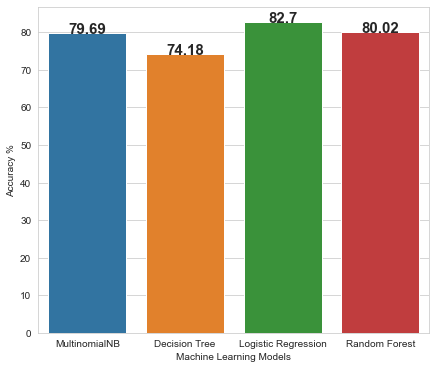

<Figure size 432x288 with 0 Axes>

In [60]:
model = ['MultinomialNB',  'Decision Tree', 'Logistic Regression', 'Random Forest']
acc = [multinomialNB_accuracy, dct_accuracy, log_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Machine Learning Models")
addlabels(model, acc)
sns.barplot(x= model, y= acc)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Final-Result-2.png', dpi=100)